<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/Z_testlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import pylab as pl
%pylab inline
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


I extracted precipitations records for Willmington from 2000/01/01 through today. 
The goal is to extract from these data the daily precipitation starting on 2018/01/01 and assess if these data are different from a population with mean $\mu = 0.14$ standard deviation $\sigma= 0.38$. 

Set a p-value at $2\sigma$:  $p=0.05$

In [46]:
# set a threshold before test
p = 0.05

In [3]:
# load raw data
rain = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/labs/1865331.csv")
rain.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD,WESD,WESF
0,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-01,0.28,NaN,0.0,NaN,NaN
1,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-02,0.00,0.0,NaN,NaN,NaN
2,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-03,0.00,0.0,NaN,NaN,NaN
3,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-04,0.00,0.0,NaN,NaN,NaN
4,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-05,0.00,NaN,NaN,NaN,NaN



The $Z$ statistics is : $Z = \frac{\bar{X} - \mu }{s}$ and $s = \sigma / \sqrt(N)$ (you should know what all those symbols mean)

1. Extract from the dataframe above the columns "DATE" and "PRCP" (precipitation)

2. Convert the dataframe DATE from ```string``` to ```datetime``` type
 using pd.datetime() 
    
3. Select the data rows with date later than 2018/01/01. 
    If your data type conversion worked well you should be able to set the condition as ```rain[<newcolumnname>]> pd.datetime("2018/01/01")```
    use the technique called "broadcasting" to select the rows: 
    
    ```rain[ rain[<newcolumnname>]> pd.datetime("2018/01/01")]``` which you can save as a new dataframe
    
4. Calculate the mean of the sample you created $\bar{X}$ and plug it in  the numerator of the $Z$ statistics: $\bar{X}- \mu$

5. Calculate the size of the sample and plug it in the formula. Now you have $Z$

6. Knowing the distribution of $Z\sim N(\mu=0, \sigma=1)$ and with a confidence $p=0.05$, did you find that the time period 2018/01/01---today has a statistically significant different amount of rain?  
    

### 1. Extract the columns "DATE" and "PRCP"

In [25]:
dataGood = rain[['DATE','PRCP']]
dataGood.head()

,DATE,PRCP
0,2010-01-01,0.28
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-05,0.00


In [26]:
dataGood['DATE'].values

array(['2010-01-01', '2010-01-02', '2010-01-03', ..., '2019-09-06',
       '2019-09-07', '2019-09-08'], dtype=object)

### 2. Covert DATE from string to datetime using pd.datetime()

In [27]:
dataGood.loc[:,'DATE'] = pd.to_datetime(dataGood.loc[:,'DATE'])
dataGood.head()

,DATE,PRCP
0,2010-01-01,0.28
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-05,0.00


In [28]:
dataGood['DATE'].values

array(['2010-01-01T00:00:00.000000000', '2010-01-02T00:00:00.000000000',
       '2010-01-03T00:00:00.000000000', ...,
       '2019-09-06T00:00:00.000000000', '2019-09-07T00:00:00.000000000',
       '2019-09-08T00:00:00.000000000'], dtype='datetime64[ns]')

### 3. Select rows later than 2018/01/01

In [32]:
sample = dataGood[dataGood.DATE > '2018-01-01']
sample.head()

,DATE,PRCP
2923,2018-01-02,0.00
2924,2018-01-03,0.00
2925,2018-01-04,0.07
2926,2018-01-05,0.20
2927,2018-01-06,0.00


### 4. Calculate mean

In [33]:
Xsample = np.mean(sample.PRCP)
Xsample

0.1625040650406504

### 5. Calculate size of the sample

In [34]:
Nsample = len(sample.PRCP)
Nsample

615

### 6. Perform Z-test

In [38]:
def Z(x, mu, sigma, N):
    # calculate Z-value
    return (x - mu) / (sigma / np.sqrt(N))

In [43]:
zvalue = Z(x=Xsample, mu=0.14, sigma=0.38, N=Nsample)
zvalue

1.4686385901934047

In [102]:
# get significant range
stats.norm.interval(alpha=1-p, loc=0, scale=1)

(-1.959963984540054, 1.959963984540054)

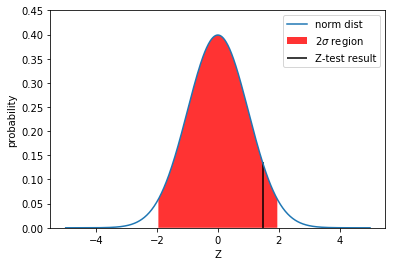

In [103]:
x = np.linspace(-5, 5, 500)
def plot(zvalue):
    pl.plot(x, stats.norm.pdf(x), label='norm dist')
    pl.fill_between(x, 0, stats.norm.pdf(x), where= (x>-1.96) & (x<1.96), 
                    facecolor='red', label='2$\sigma$ region', alpha=0.8)
    pl.vlines(x=zvalue, ymin=0, ymax=stats.norm.pdf(zvalue), label='Z-test result')
    pl.ylim([0,0.45])
    pl.legend()
    pl.xlabel('Z')
    pl.ylabel('probability')
    
plot(zvalue)

The Z-test result is within significant range, therefore we can not reject the null hyphthesis that the sample of daily precipitation starting on 2018/01/01 are from a population with mean $\mu = 0.14$ standard deviation $\sigma= 0.38$